Week 10: Neural Nets Regression

5.1 Noisy Lennard-Jones-Gauss data

In [1]:
# create some noise LJ data

def LJ_pot(r,eps=1,sigma=1):
    V = 4*eps*((sigma/r)**12-(sigma/r)**6)
    return V


-0.3203365942785745


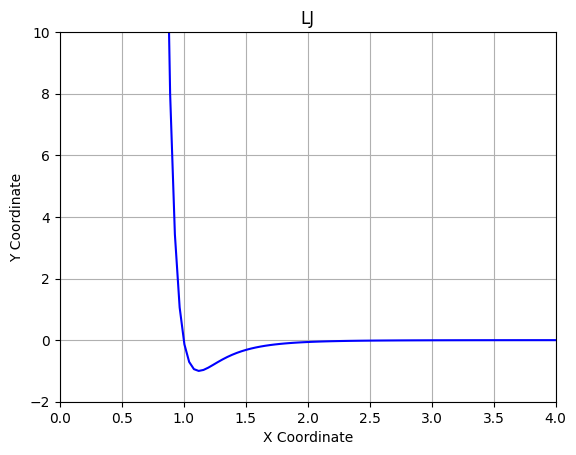

In [2]:
import numpy as np
import matplotlib.pyplot as plt

print(LJ_pot(1.5))
xs = np.linspace(0.2,4,100)
ys = LJ_pot(xs,1,1)

# Plot the original input points
plt.plot(xs, ys, color='blue')

# Labeling the plot
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('LJ')
plt.xlim(0,4)
plt.ylim(-2,10)
plt.grid(True)

# Show the plot
plt.show()

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def noisy_LJ(xs, noise_level, seed=42):
    np.random.seed(seed)
    ys = LJ_pot(xs)
    noise = noise_level * np.random.uniform(-1, 1, size=xs.shape)
    return ys + noise



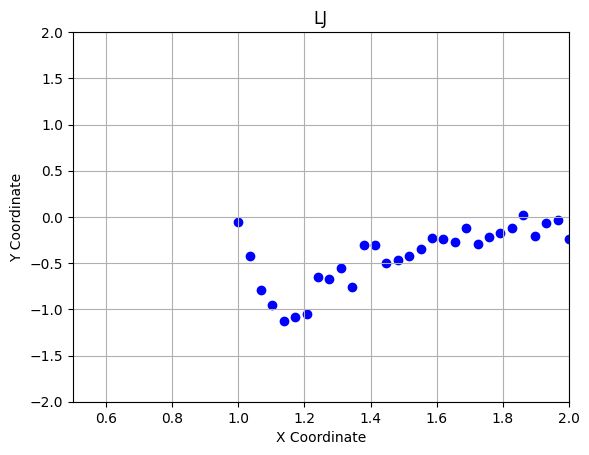

In [25]:


xs = np.linspace(1, 2, 30)
ys = noisy_LJ(xs, 0.2)

# Plot the original input points
plt.scatter(xs, ys, color='blue')

# Labeling the plot
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('LJ')
plt.xlim(0.5, 2)
plt.ylim(-2, 2)
plt.grid(True)

# Show the plot
plt.show()


5.2 Deep neural network fit

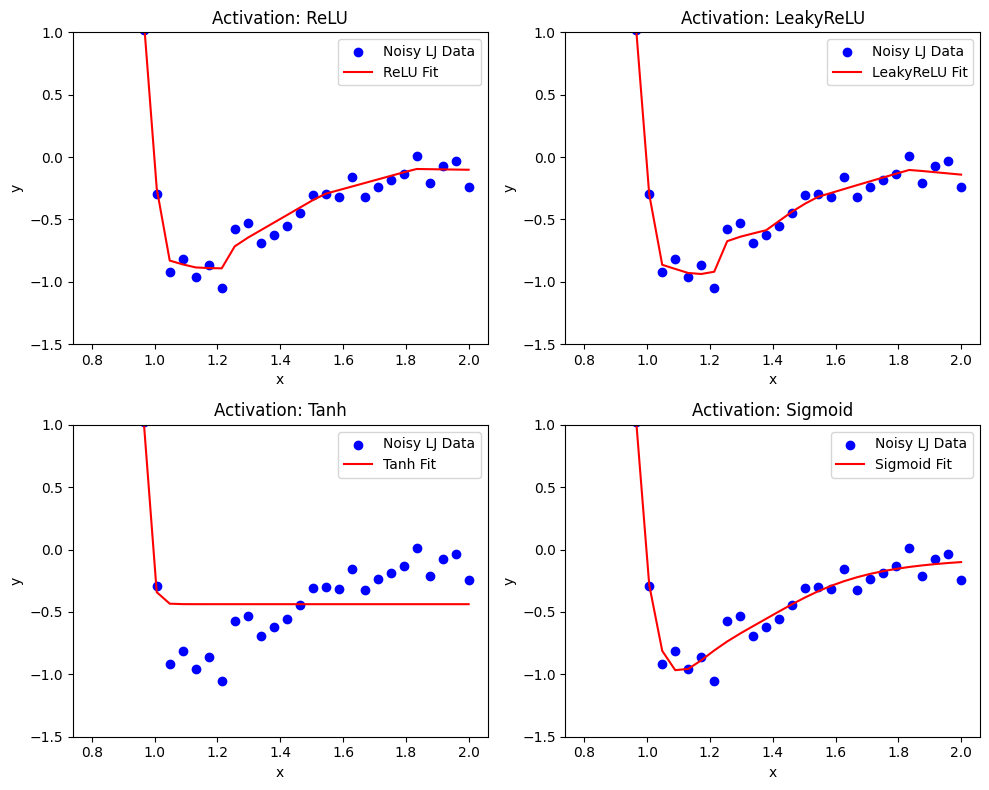

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Define the Lennard-Jones potential
def LJ_pot(xs):
    return 4 * ((1 / xs) ** 12 - (1 / xs) ** 6)

# Add noise to the LJ potential
def noisy_LJ(xs, noise_level, seed=None):
    if seed is not None:
        np.random.seed(seed)
    ys = LJ_pot(xs)
    noise = noise_level * np.random.uniform(-1, 1, size=xs.shape)
    return ys + noise

# Define the neural network
class LJNet(nn.Module):
    def __init__(self, activation_func):
        super(LJNet, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 1)
        self.activation = activation_func

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.activation(self.fc3(x))
        x = self.fc4(x)  # Linear output
        return x

# Training function
def train_model(activation_func, x_train, y_train, epochs=1000, lr=0.01):
    model = LJNet(activation_func)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(x_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

    # Get predictions
    model.eval()
    with torch.no_grad():
        predictions = model(x_train).numpy()
    return predictions

# Prepare data
xs = np.linspace(0.8, 2, 30)
ys = noisy_LJ(xs, 0.2, seed=42)
x_train = torch.tensor(xs, dtype=torch.float32).view(-1, 1)
y_train = torch.tensor(ys, dtype=torch.float32).view(-1, 1)

# Define activation functions
activation_functions = {
    "ReLU": nn.ReLU(),
    "LeakyReLU": nn.LeakyReLU(),
    "Tanh": nn.Tanh(),
    "Sigmoid": nn.Sigmoid()
}

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.ravel()

# Train and plot for each activation function
for i, (name, activation_func) in enumerate(activation_functions.items()):
    predictions = train_model(activation_func, x_train, y_train)
    axes[i].scatter(xs, ys, label='Noisy LJ Data', color='blue')
    axes[i].plot(xs, predictions, label=f'{name} Fit', color='red')
    axes[i].set_title(f'Activation: {name}')
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')
    axes[i].set_ylim(-1.5,1)
    axes[i].legend()

plt.tight_layout()
plt.show()
